<a href="https://colab.research.google.com/github/dr-song-summer-project/ChatBot_Preprocessing/blob/main/AI/Answer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# 답변 Clustering 

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

path = '/gdrive/My Drive/Colab Notebooks/Src/sample_data_preprocessed_4100.xlsx'

df = pd.read_excel(path)
data = pd.DataFrame()
data['answers'] = df['답변']

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

df['content_cleaned'] = data['answers'].apply(preprocessing)
content = df['content_cleaned'].tolist()

# CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

# l2 정규화
X = normalize(X)

# 군집화 할 그룹의 갯수 정의
n_clusters = 100

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# labels에 merge
df['labels'] = labels

df.loc[df['labels']==1,['content_cleaned', 'labels']]

,content_cleaned,labels
54,부정출혈인지 생리인지 애매할 때에는 생리로 간주하고 출혈 시작 일부터 피임약을 복...,1
67,드시면 좋습니다 혈전증 부작용 때문에 지용성 비타민 드시면 안 된다는 이야기는 ...,1
82,사후 피임약의 일반적인 주의사항입니다 복용 후 주 이내에 부정 자궁출혈이 있을...,1
106,경구 피임약 복용 후 휴약기에 사 후 피임약을 드실 필요는 없었을 것으로 생각됩니...,1
245,사후 피임약 복용 후 약 주 정도 후에 생리혈이 보입니다 보통 량은 적은 편입...,1
...,...,...
3530,대부분의 알약 복용 원칙은 충분한 물과 함께 복용함이 원칙입니다 커피 우유 등...,1
3808,부작용이 덜 합니다 야 는 세대로 가장 부작용이 적습니다 세대구분은 부작용...,1
3870,시간 전이면 생각나자마자 복용하시면 됩니다 직전 일 연속 복용 중 이시면 ...,1
3876,역시 그렇군요 너무 염려 마세요 세 밖에 안 되셨기 때문에 복용 기간이 ...,1


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

sse = []

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

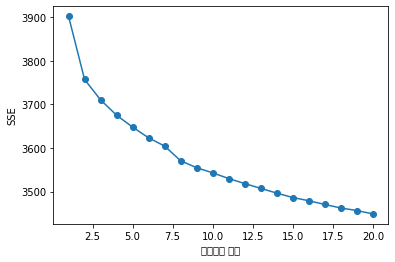

In [ ]:
def elbow(X, n):
  for i in range(n, n+5):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    sse.append(km.inertia_)
  plt.plot(range(1, n+5), sse, marker='o')
  plt.xlabel('클러스터 갯수')
  plt.ylabel('SSE')
  plt.show()

elbow(X, 16)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

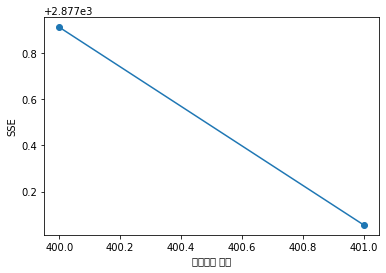

In [ ]:
smaple = []

def elbow(X, n):
  for i in range(n, n+2):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    smaple.append(km.inertia_)
  plt.plot(range(n, n+2), smaple, marker='o')
  plt.xlabel('클러스터 갯수')
  plt.ylabel('SSE')
  plt.show()

elbow(X, 400)

In [ ]:
df_clustering = df[['content_cleaned', 'labels']]

# df.to_excel("/content/clusted_all.xlsx", sheet_name="질문 포함")
# df_clustering.to_excel("/content/clustered_answer.xlsx", sheet_name="답변 클러스터링")

with pd.ExcelWriter('/content/clustered.xlsx') as writer:
    df_clustering.to_excel(writer, sheet_name='clustered_answer')
    df.to_excel(writer, sheet_name='clusted_all')



In [ ]:
with pd.ExcelWriter('/content/clustered_종류.xlsx') as writer:  
  for i in range(0, n_clusters):
    df_sample = df.loc[df['labels']==i,['질문','content_cleaned', 'labels']]
    df_sample.to_excel(writer, sheet_name='Label 1')